In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.3 scipy==1.7.0 pandas==1.3.1 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [3]:
# notebaly, different package version affect the result of clustering
# you may need to manually determine cell tyoe

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
filtered out 673 cells that have less than 500 genes expressed
filtered out 19601 genes that are detected in less than 5 cells
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:00)


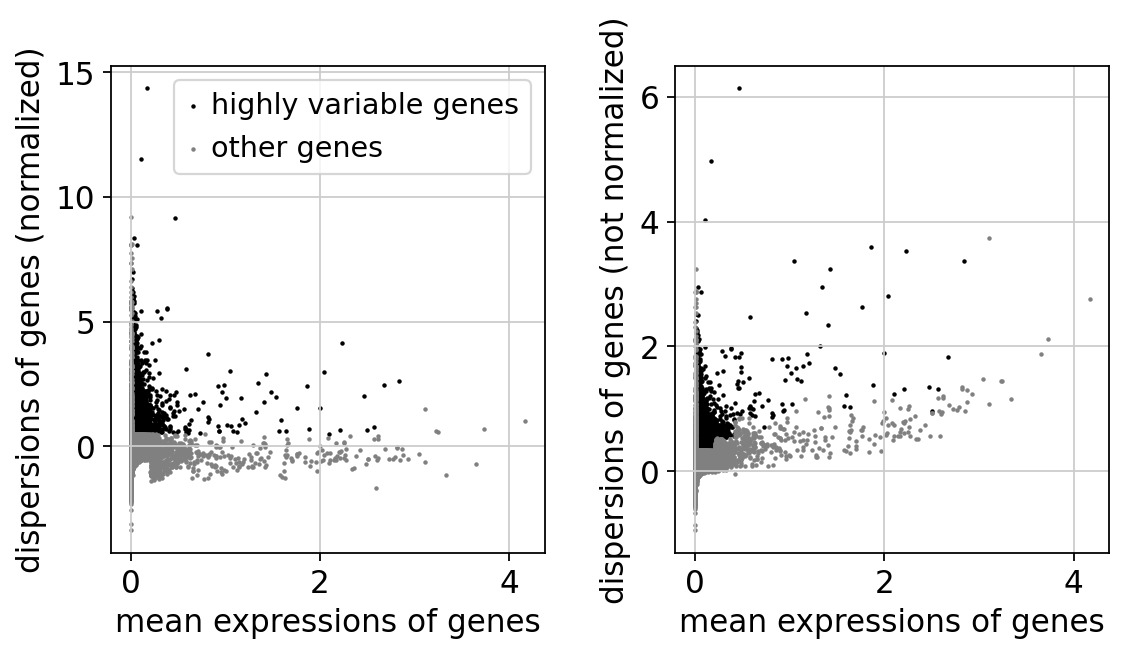

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:05)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


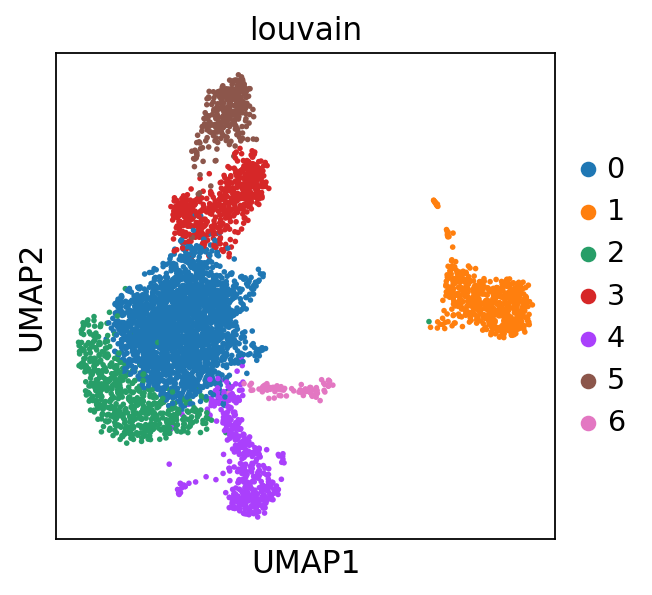

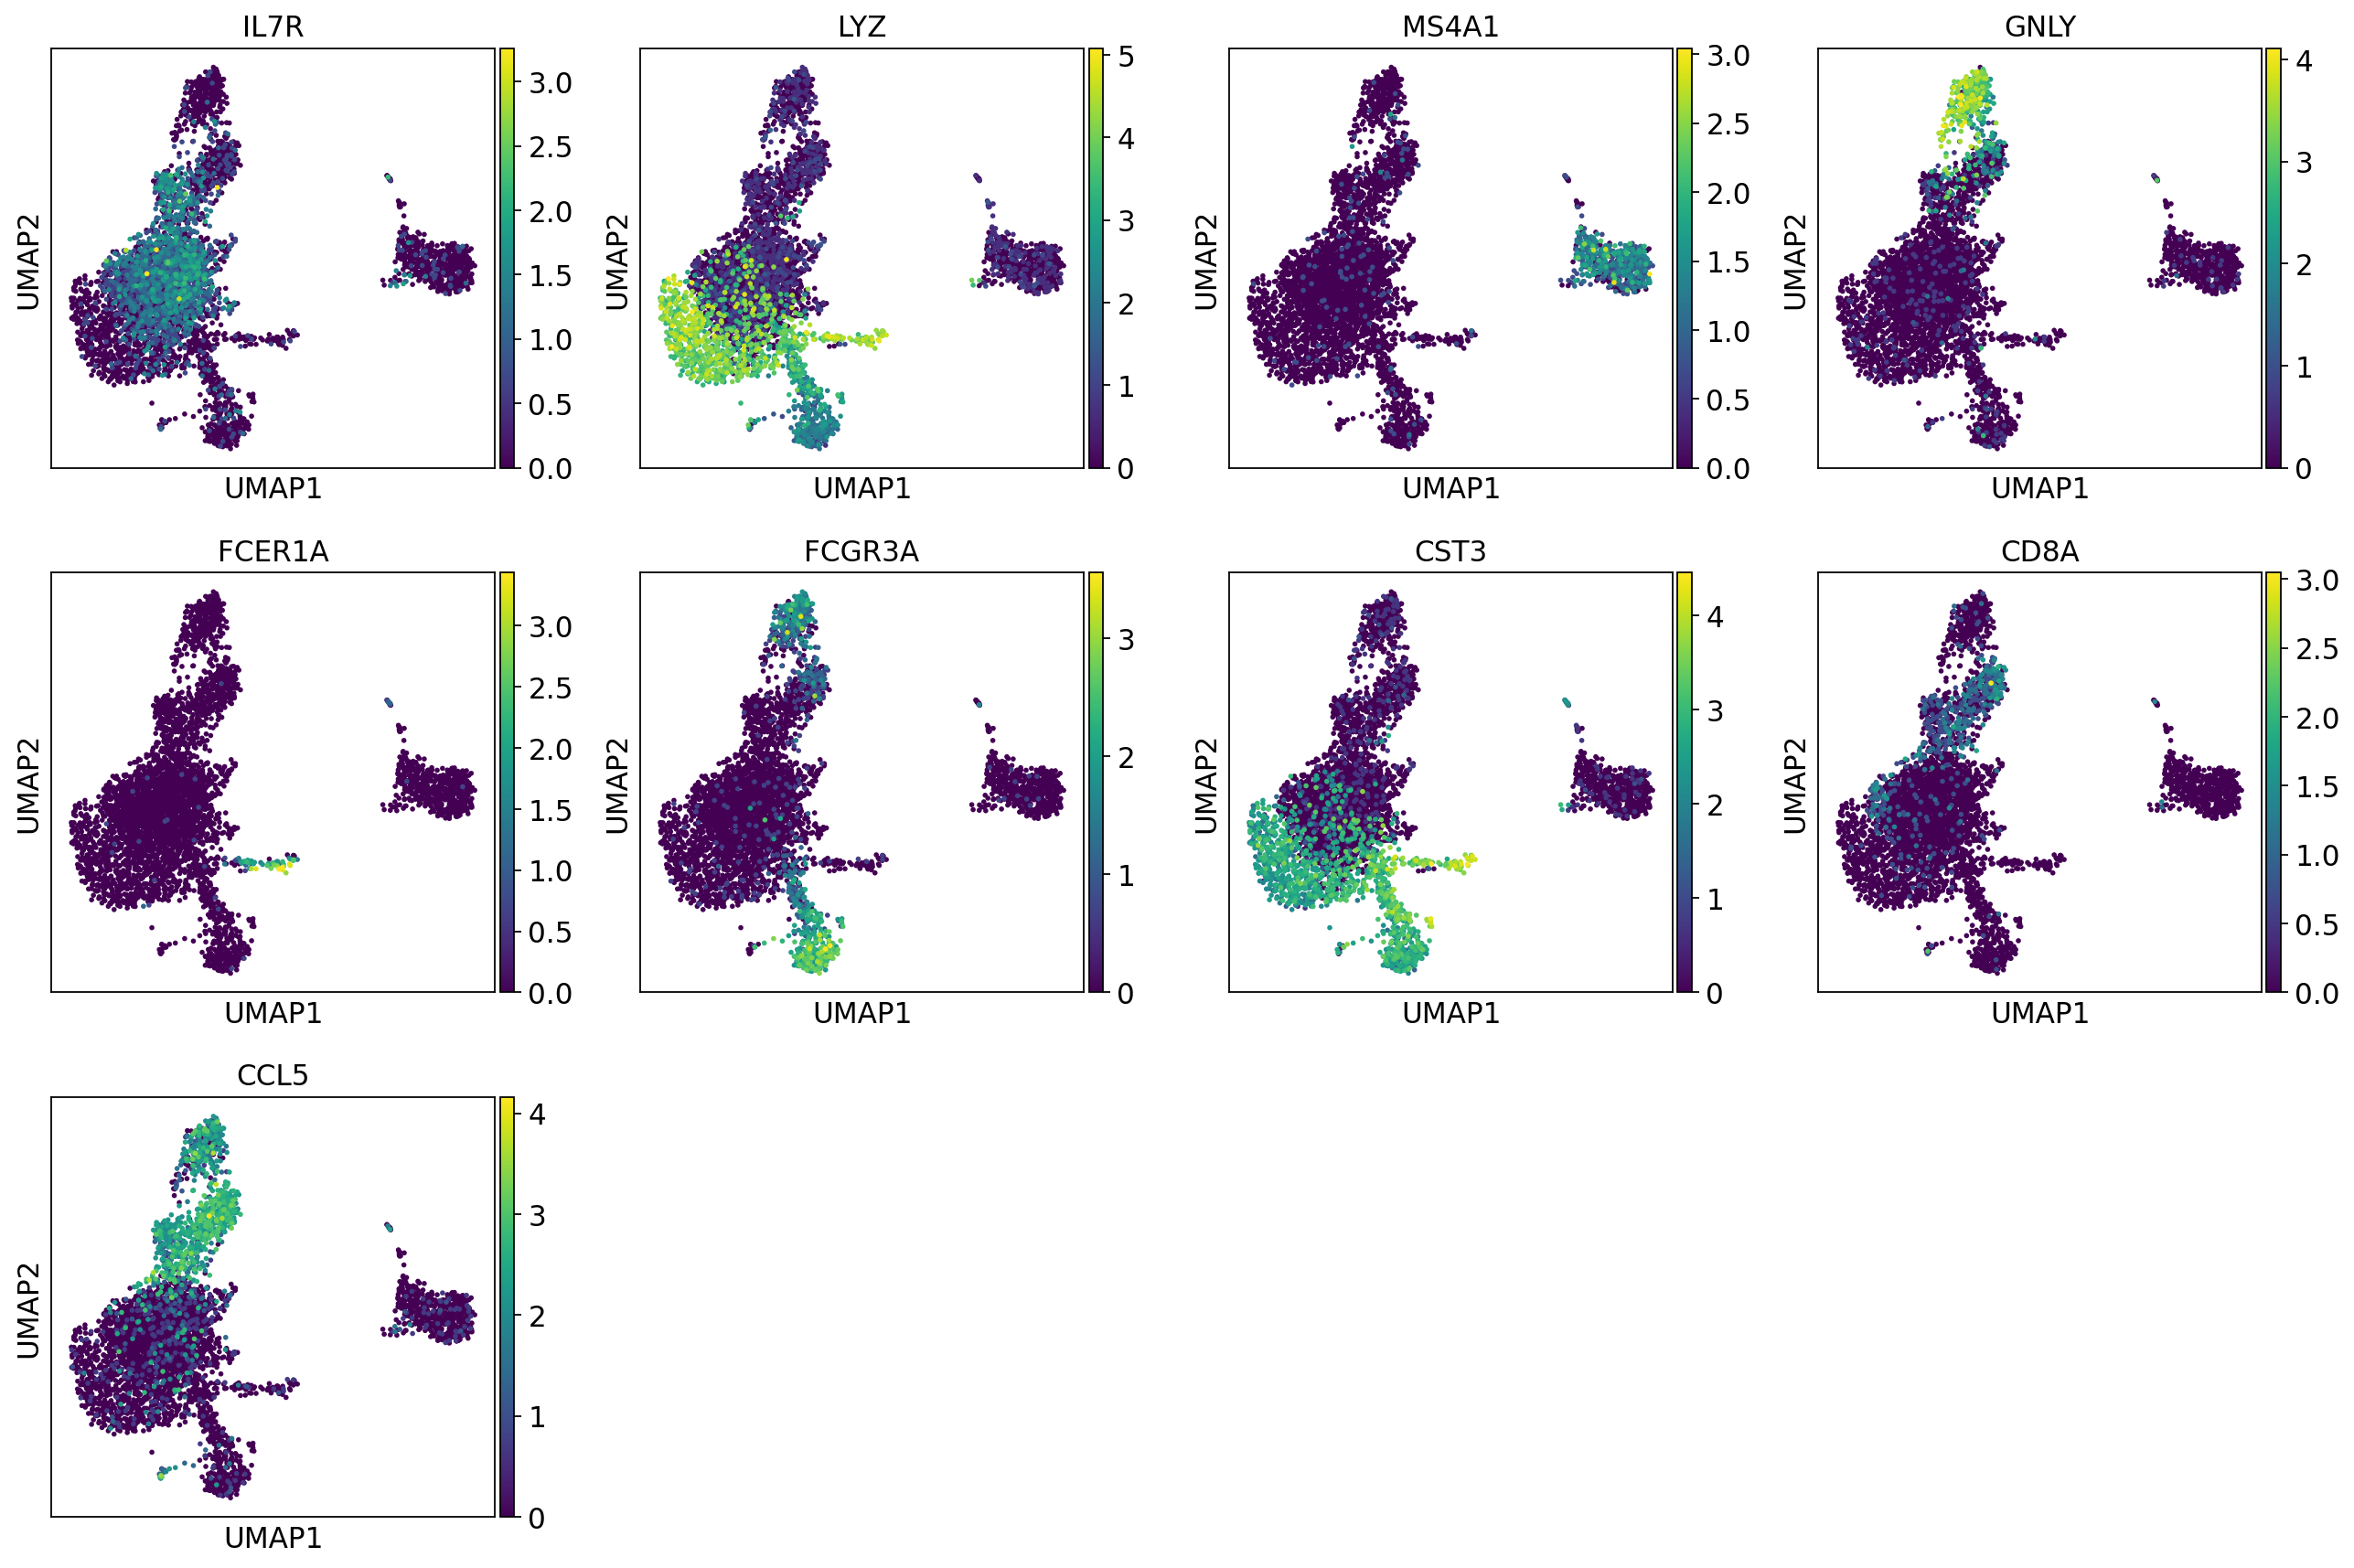

/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


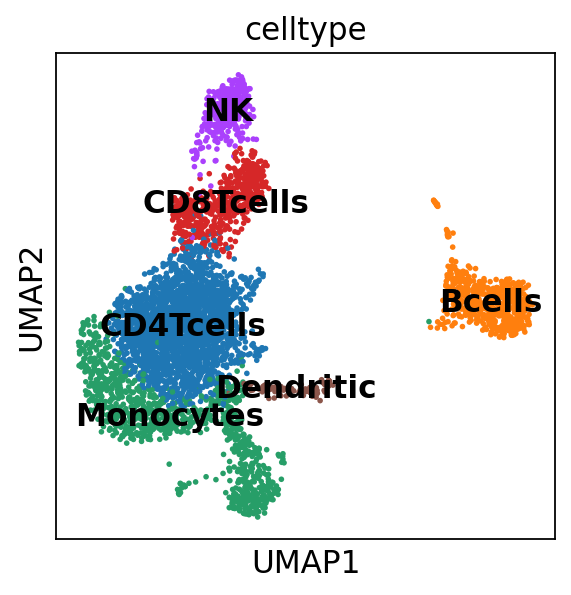

In [4]:
data_path = 'PBMC_train/data6k/'
out_path = data_path
adata = sc.read(data_path + 'matrix.mtx').T
adata.var_names = pd.read_csv(data_path + 'genes.tsv', header=None, sep='\t')[1]
adata.obs_names = pd.read_csv(data_path + 'barcodes.tsv', header=None)[0]
adata.var_names_make_unique()
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)
#sc.pl.scatter(adata, x='n_counts', y='n_genes')
adata = adata[adata.obs['n_genes'] < 2000, :]
adata = adata[adata.obs['n_counts'] < 6000, :]
adata.raw = sc.pp.log1p(adata, copy=True)
df = pd.DataFrame(adata.X.todense())
df.columns = adata.var.index
df.to_csv(out_path + "data6k_counts_all.txt", sep="\t")
sc.pp.normalize_per_cell(adata)
df = pd.DataFrame(adata.X.todense())
df.columns = adata.var.index
df.to_csv(out_path + "data6k_norm_counts_all.txt", sep="\t")
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
adata.X_noscale = adata.X
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.6)
sc.pl.umap(adata, color='louvain')
sc.pl.umap(adata, color=['IL7R', 'LYZ', 'MS4A1', 'GNLY', 'FCER1A', 'FCGR3A', 'CST3', 'CD8A', 'CCL5'])
new_celltypes = ['CD4Tcells', 'Bcells', 'Monocytes', 'CD8Tcells', 'Monocytes2', 'NK', 'Dendritic',]
adata.rename_categories('louvain', new_celltypes)
#sc.pl.umap(adata, color='louvain', legend_loc='on data')
celltypes = pd.DataFrame(adata.obs['louvain'])
celltypes.louvain.replace(['Monocytes2'],
                          ['Monocytes'], inplace=True)
adata.obs['celltype'] = celltypes.louvain
sc.pl.umap(adata, color='celltype', legend_loc='on data')
celltypes = pd.DataFrame(adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv(out_path + "data6k_celltypes.txt", sep="\t")

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
filtered out 16644 genes that are detected in less than 5 cells
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:00)


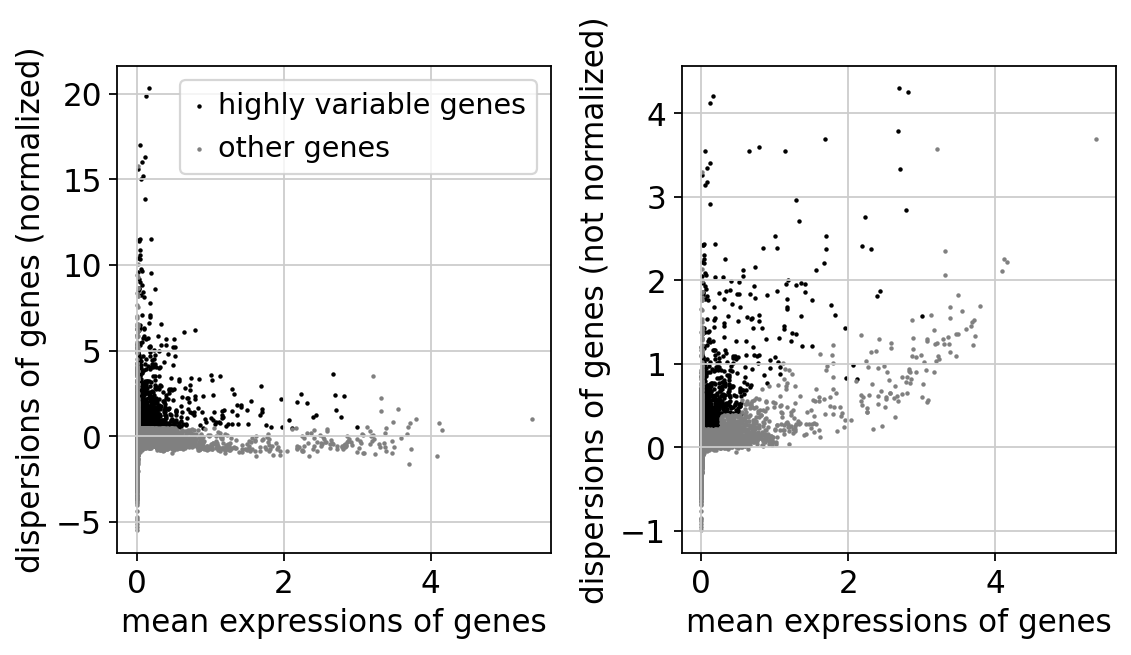

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:05)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


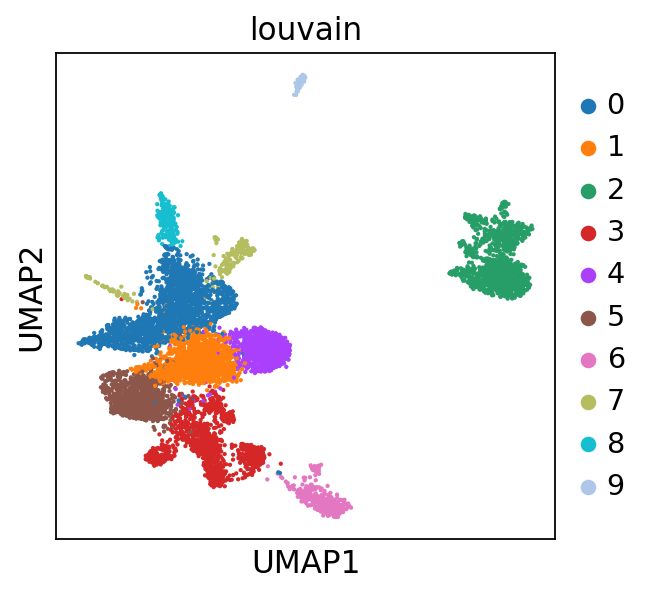

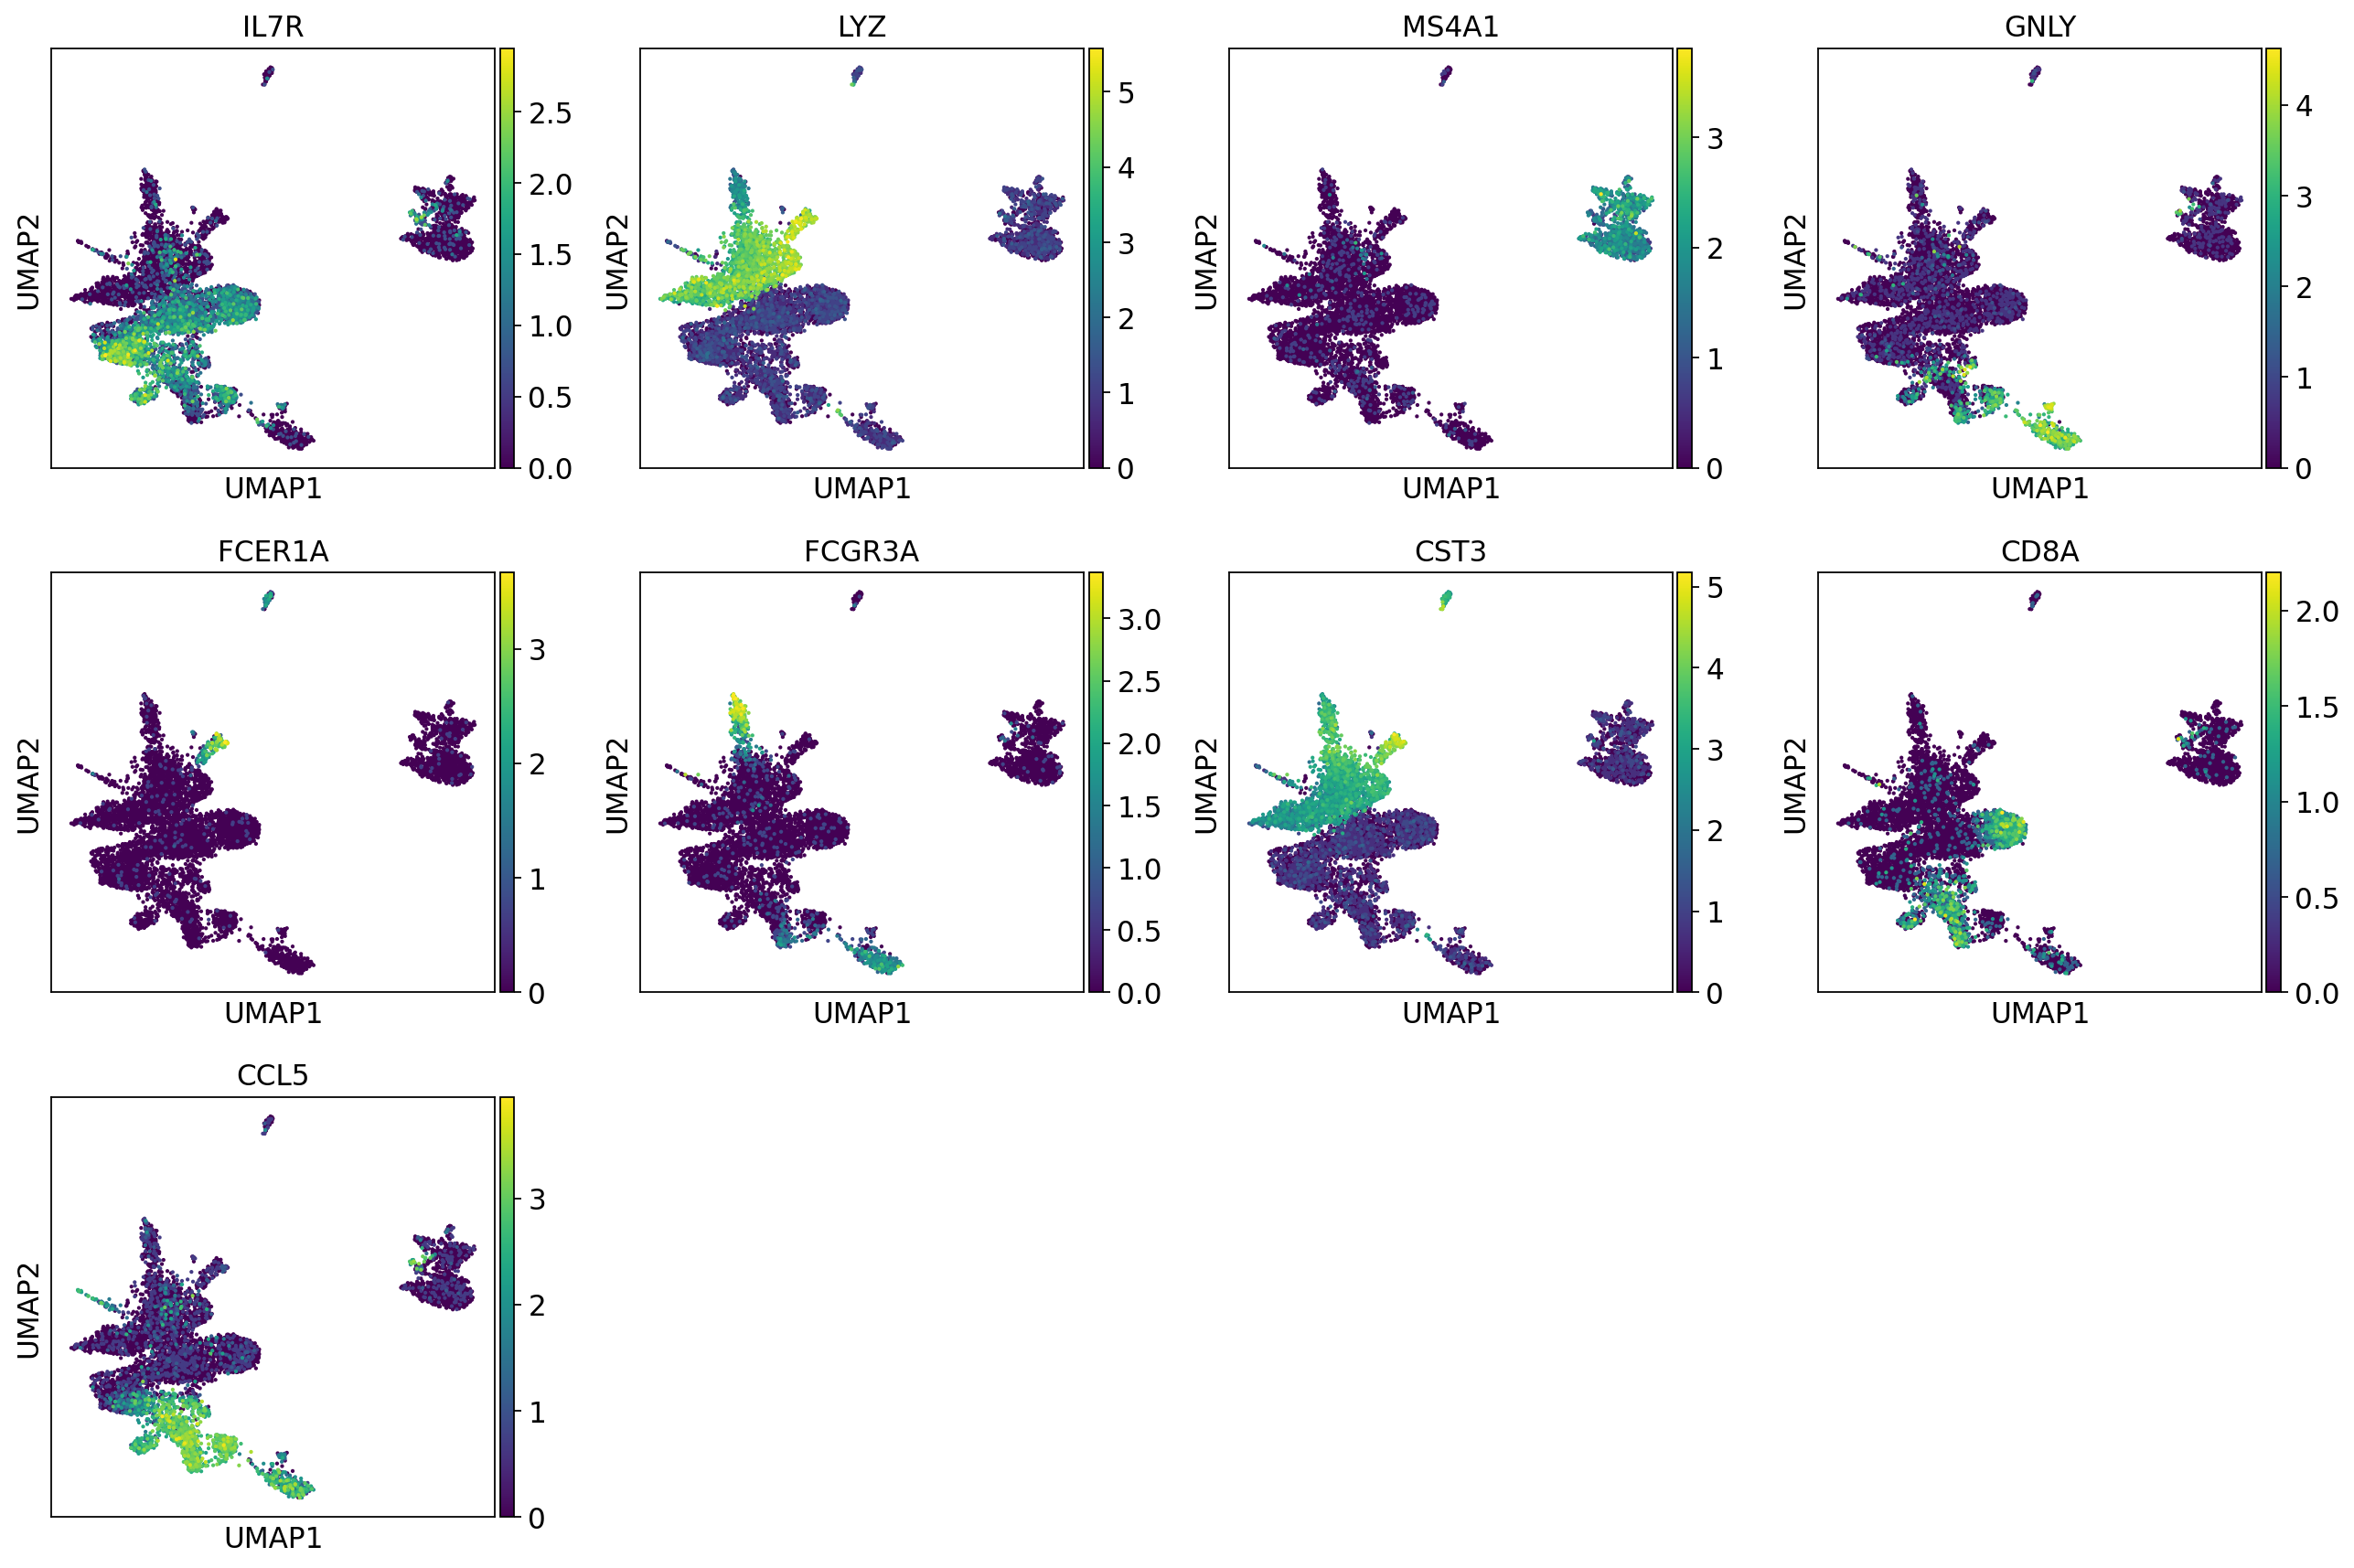

/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


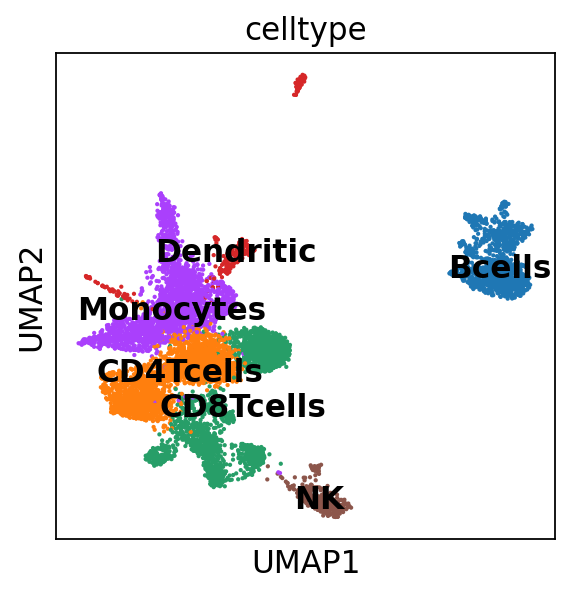

In [5]:
data_path = 'PBMC_train/data8k/'
out_path = data_path
adata = sc.read(data_path + 'matrix.mtx').T
adata.var_names = pd.read_csv(data_path + 'genes.tsv', header=None, sep='\t')[1]
adata.obs_names = pd.read_csv(data_path + 'barcodes.tsv', header=None)[0]
adata.var_names_make_unique()
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)
#sc.pl.scatter(adata, x='n_counts', y='n_genes')
adata = adata[adata.obs['n_genes'] < 3000, :]
adata = adata[adata.obs['n_counts'] < 13000, :]
adata.raw = sc.pp.log1p(adata, copy=True)
df = pd.DataFrame(adata.X.todense())
df.columns = adata.var.index
df.to_csv(out_path + "data8k_counts_all.txt", sep="\t")
sc.pp.normalize_per_cell(adata)
df = pd.DataFrame(adata.X.todense())
df.columns = adata.var.index
df.to_csv(out_path + "data8k_norm_counts_all.txt", sep="\t")
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
adata.X_noscale = adata.X
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata, resolution=0.5)
sc.pl.umap(adata, color='louvain')
sc.pl.umap(adata, color=['IL7R', 'LYZ', 'MS4A1', 'GNLY', 'FCER1A', 'FCGR3A', 'CST3', 'CD8A', 'CCL5'])
new_celltypes = ['Monocytes','CD4Tcells','Bcells','CD8Tcells','CD8Tcells2','CD4Tcells2','NK','Dendritic', 'Monocytes2','Dendritic2']
adata.rename_categories('louvain', new_celltypes)
# Make new category
celltypes = pd.DataFrame(adata.obs['louvain'])
celltypes.louvain.replace(['CD4Tcells2', 'CD8Tcells2', 'Monocytes2','Dendritic2'],
                          ['CD4Tcells', 'CD8Tcells', 'Monocytes','Dendritic'], inplace=True)
adata.obs['celltype'] = celltypes.louvain
sc.pl.umap(adata, color='celltype', legend_loc='on data')
celltypes = pd.DataFrame(adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv(out_path + "data8k_celltypes.txt", sep="\t")

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
filtered out 194 cells that have less than 500 genes expressed
filtered out 20735 genes that are detected in less than 5 cells
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:00)


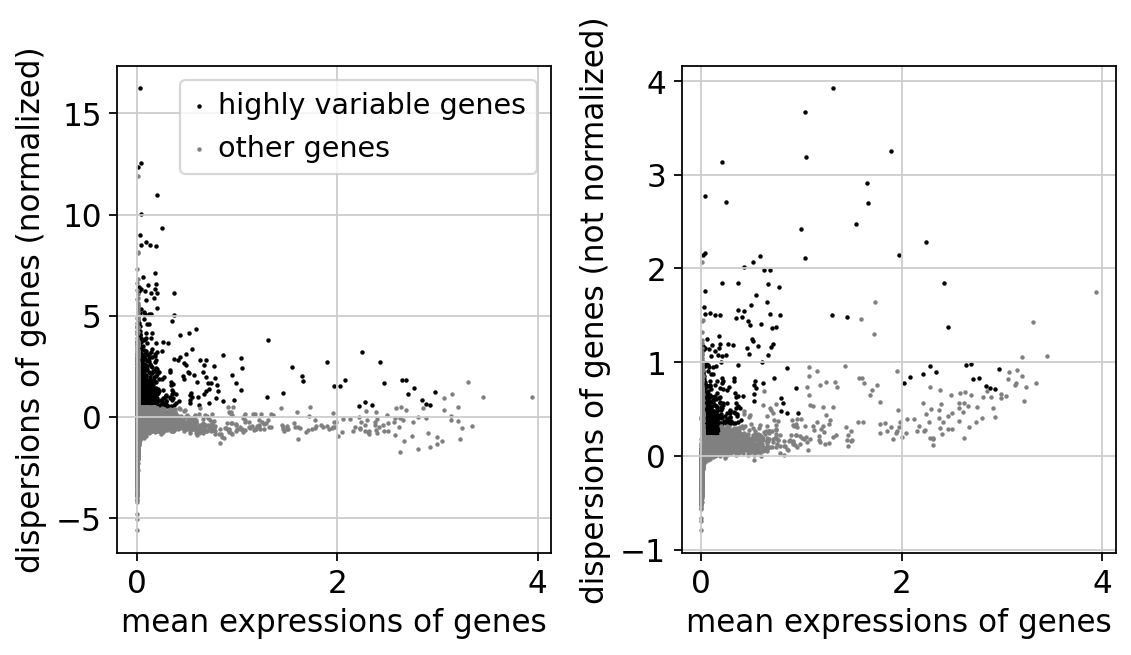

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


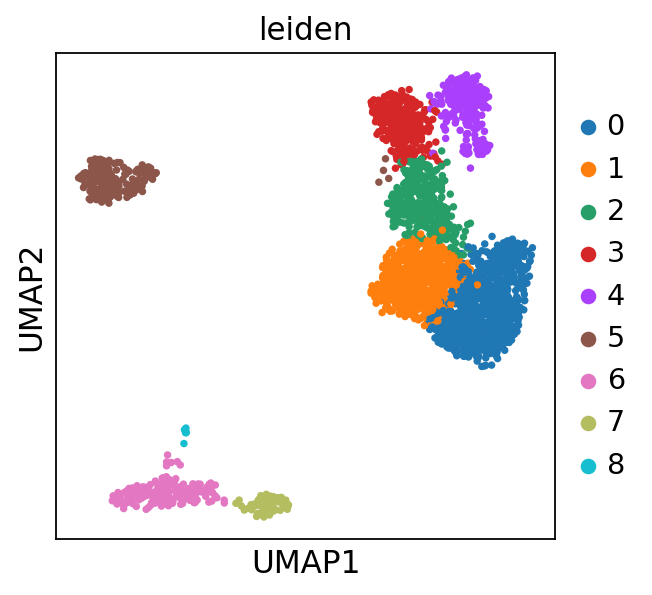

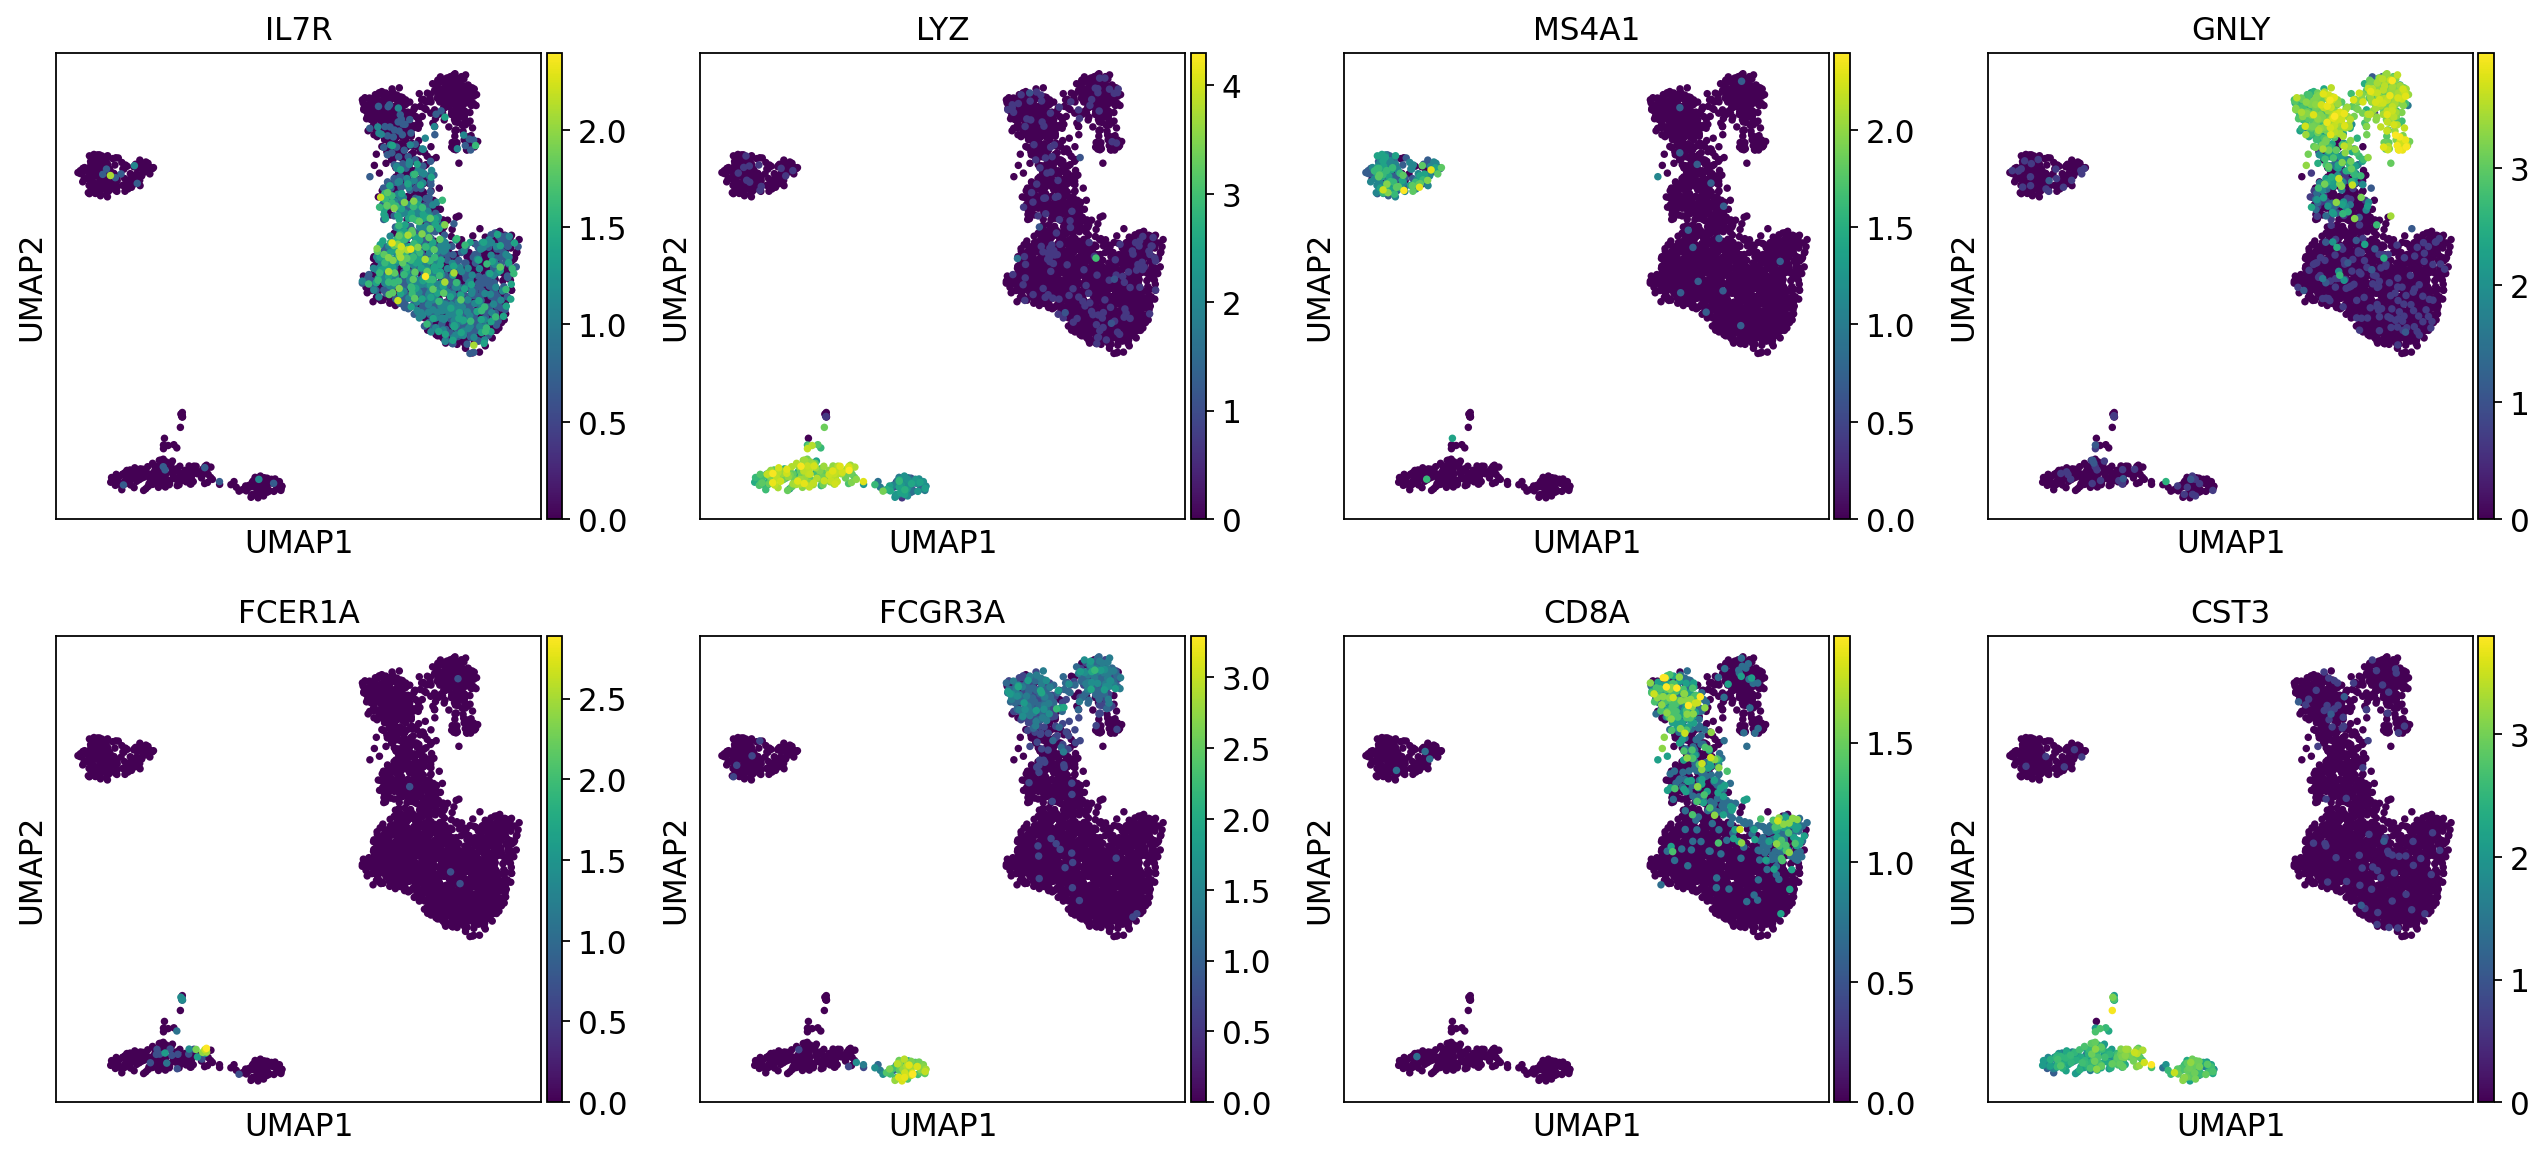

In [6]:
path_a = 'PBMC_train/donorA/'
out_path = path_a

# Load Donor A
a_adata = sc.read(path_a + 'matrix.mtx').T
a_adata.var_names = pd.read_csv(path_a + 'genes.tsv', header=None, sep='\t')[1]
a_adata.obs_names = pd.read_csv(path_a + 'barcodes.tsv', header=None)[0]
a_adata.var_names_make_unique()
sc.pp.filter_cells(a_adata, min_genes=500)
sc.pp.filter_genes(a_adata, min_cells=5)
a_adata.obs['n_counts'] = a_adata.X.sum(axis=1)
#sc.pl.scatter(a_adata, x='n_counts', y='n_genes')
a_adata = a_adata[a_adata.obs['n_genes'] < 1500, :]
a_adata = a_adata[a_adata.obs['n_counts'] < 5000, :]
a_adata.raw = sc.pp.log1p(a_adata, copy=True)
df = pd.DataFrame(a_adata.X.todense())
df.columns = a_adata.var.index
df.to_csv(out_path + "donorA_counts_all.txt", sep="\t")
sc.pp.normalize_per_cell(a_adata)
df = pd.DataFrame(a_adata.X.todense())
df.columns = a_adata.var.index
df.to_csv(out_path + "donorA_norm_counts_all.txt", sep="\t")
filter_result = sc.pp.filter_genes_dispersion(a_adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
a_adata = a_adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(a_adata)
a_adata.X_noscale = a_adata.X
sc.pp.log1p(a_adata)
sc.pp.regress_out(a_adata, ['n_counts'])
sc.pp.scale(a_adata)
sc.pp.neighbors(a_adata)
sc.tl.umap(a_adata)
sc.tl.leiden(a_adata, resolution=1)
sc.pl.umap(a_adata, color='leiden')
sc.pl.umap(a_adata, color=['IL7R', 'LYZ', 'MS4A1', 'GNLY', 'FCER1A', 'FCGR3A', 'CD8A', 'CST3'])

/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


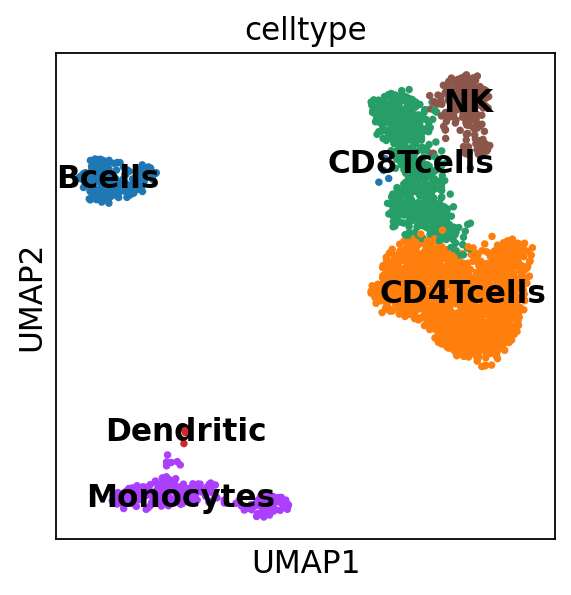

In [7]:
new_celltypes = ['CD4Tcells','CD4Tcells2', 'CD8Tcells','CD8Tcells2', 'NK', 'Bcells', 'Monocytes', 'Monocytes2','Dendritic']
a_adata.rename_categories('leiden', new_celltypes)
celltypes = pd.DataFrame(a_adata.obs['leiden'])
celltypes.leiden.replace(['Monocytes2','CD4Tcells2','CD8Tcells2'],
                          ['Monocytes','CD4Tcells','CD8Tcells'], inplace=True)
a_adata.obs['celltype'] = celltypes.leiden
sc.pl.umap(a_adata, color='celltype', legend_loc='on data')
celltypes = pd.DataFrame(a_adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv(out_path + "donorA_celltypes.txt", sep="\t")

In [8]:
path_c = 'PBMC_train/donorC/'
out_path = path_c
c_adata = sc.read(path_c + 'matrix.mtx').T
c_adata.var_names = pd.read_csv(path_c + 'genes.tsv', header=None, sep='\t')[1]
c_adata.obs_names = pd.read_csv(path_c + 'barcodes.tsv', header=None)[0]
c_adata.var_names_make_unique()
sc.pp.filter_cells(c_adata, min_genes=500)
sc.pp.filter_genes(c_adata, min_cells=5)
c_adata.obs['n_counts'] = c_adata.X.sum(axis=1)
#sc.pl.scatter(c_adata, x='n_counts', y='n_genes')
c_adata = c_adata[c_adata.obs['n_genes'] < 2000, :]
c_adata = c_adata[c_adata.obs['n_counts'] < 6000, :]
c_adata.raw = sc.pp.log1p(c_adata, copy=True)
# Save raw matrix for MuSic
df = pd.DataFrame(c_adata.X.todense())
df.columns = c_adata.var.index
df.to_csv(out_path + "donorC_counts_all.txt", sep="\t")
# Normalize
sc.pp.normalize_per_cell(c_adata)
# Save the complete matrix
df = pd.DataFrame(c_adata.X.todense())
df.columns = c_adata.var.index
df.to_csv(out_path + "donorC_norm_counts_all.txt", sep="\t")

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
filtered out 1197 cells that have less than 500 genes expressed
filtered out 18626 genes that are detected in less than 5 cells
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:00)


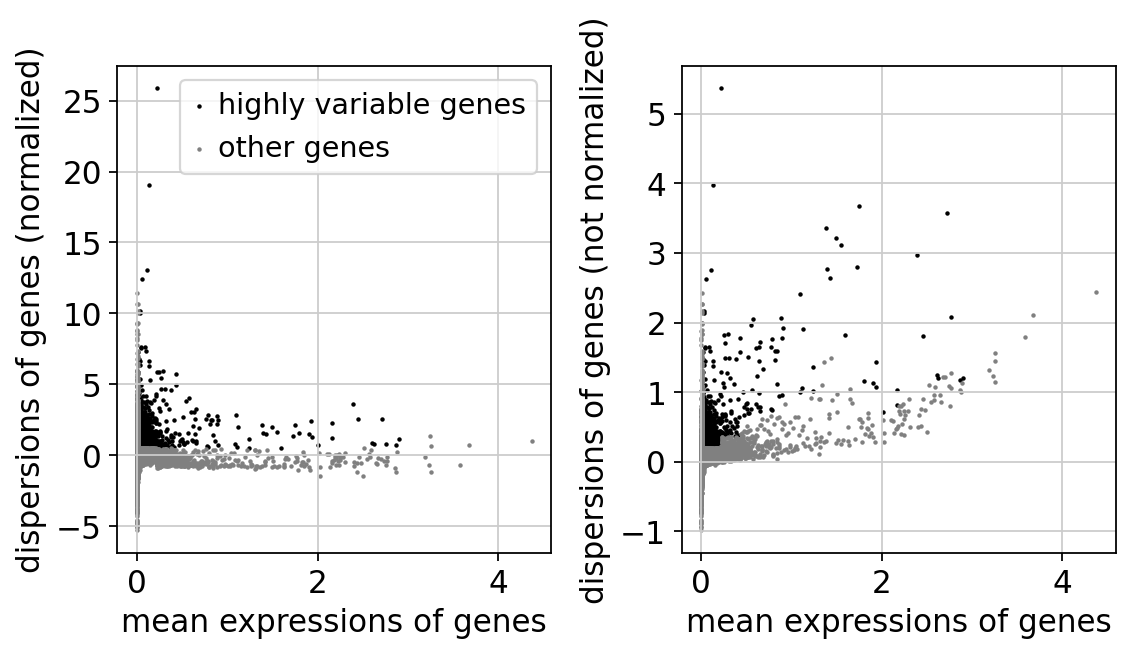

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:07)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:01)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


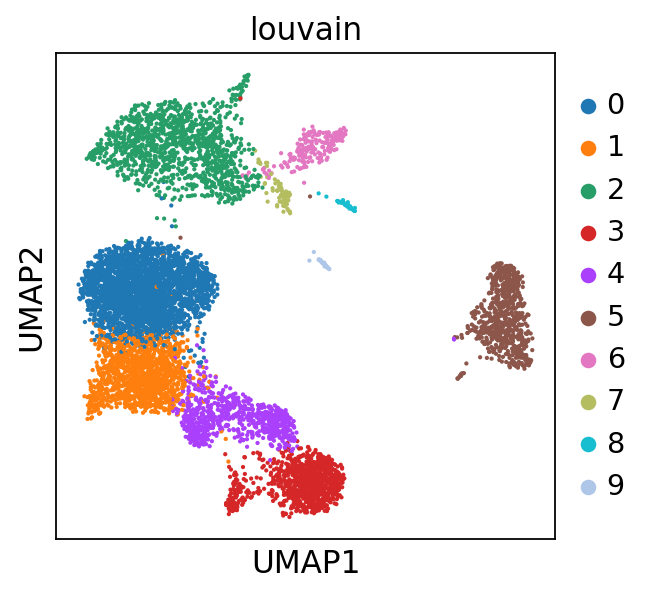

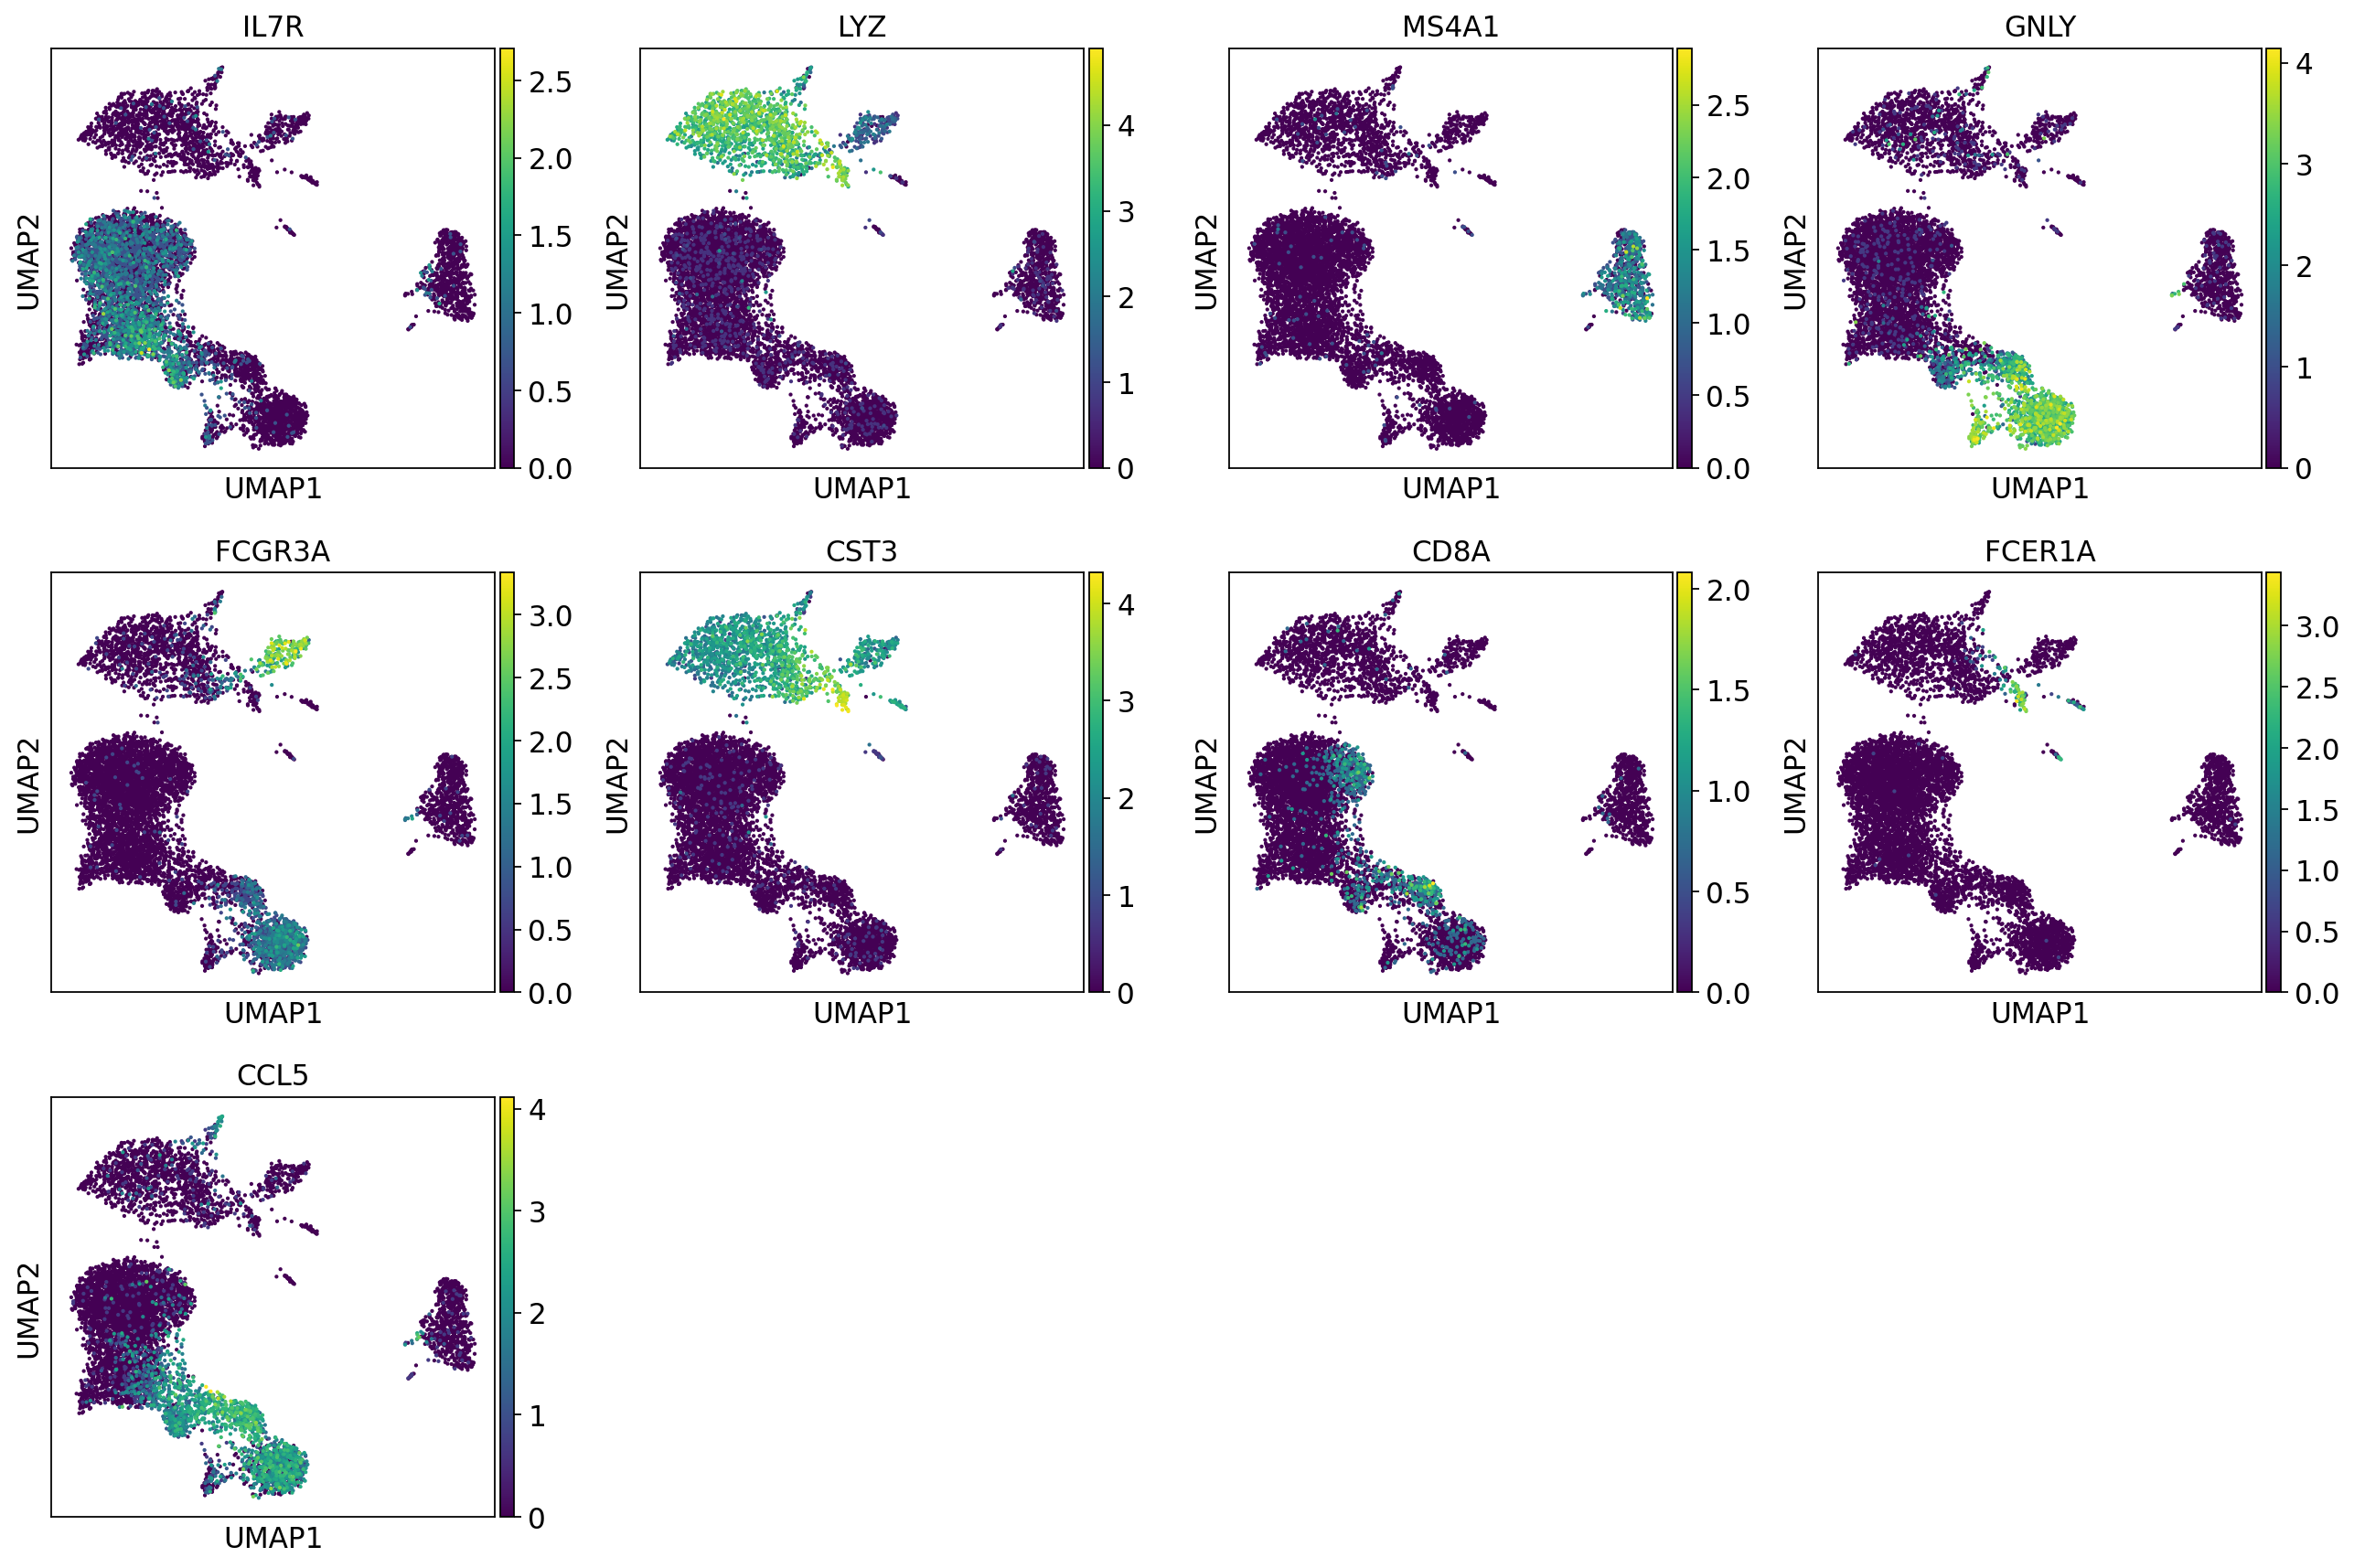

In [9]:
filter_result = sc.pp.filter_genes_dispersion(c_adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)
c_adata = c_adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(c_adata)
c_adata.X_noscale = c_adata.X
sc.pp.log1p(c_adata)
sc.pp.regress_out(c_adata, ['n_counts'])
sc.pp.scale(c_adata)
sc.pp.neighbors(c_adata)
sc.tl.umap(c_adata)
sc.tl.louvain(c_adata, resolution=0.7)
sc.pl.umap(c_adata, color='louvain')
sc.pl.umap(c_adata, color=['IL7R', 'LYZ', 'MS4A1', 'GNLY', 'FCGR3A', 'CST3', 'CD8A', 'FCER1A', 'CCL5'])

/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/home/chenyanshuo/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


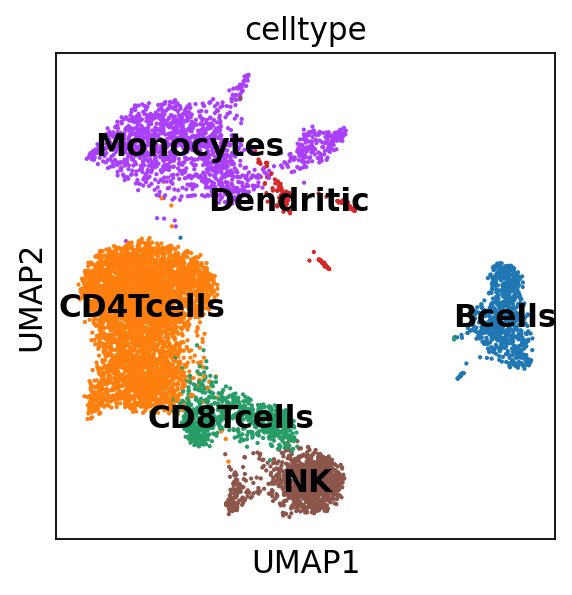

In [10]:
new_celltypes = ['CD4Tcells', 'CD4Tcells2', 'Monocytes', 'NK','CD8Tcells', 'Bcells',
                 'Monocytes2','Dendritic','Dendritic2', 'Dendritic3']
c_adata.rename_categories('louvain', new_celltypes)
#sc.pl.umap(c_adata, color='louvain', legend_loc='on data')
c_adata.rename_categories('louvain', new_celltypes)
#sc.pl.umap(c_adata, color='louvain', legend_loc='on data')
celltypes = pd.DataFrame(c_adata.obs['louvain'])
celltypes.louvain.replace(['Monocytes2', 'CD4Tcells2','Dendritic2','Dendritic3'],
                          ['Monocytes', 'CD4Tcells','Dendritic','Dendritic'], inplace=True)
c_adata.obs['celltype'] = celltypes.louvain
sc.pl.umap(c_adata, color='celltype', legend_loc='on data')
celltypes = pd.DataFrame(c_adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv(out_path + "donorC_celltypes.txt", sep="\t")